In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
working_dir = r'../../../outputs/agg'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"5,745,751","3,872,368"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"2,419,962","1,656,146"


# Total Trips

In [6]:
df = load_data('trip_purpose_mode')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"23,251,770","14,717,576"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"9,210,232","6,593,850"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.37
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       4.80     31.97      0.00
           survey     -1.00     -1.00     -1.00
HOV2       model       8.10     19.05      2.65
           survey     -1.00     -1.00     -1.00
HOV3+      model       8.42     19.46      2.76
           survey     -1.00     -1.00     -1.00
Other      survey     -1.00     -1.00     -1.00
SOV        model       8.11     19.48      2.62
           survey     -1.00     -1.00     -1.00
School Bus model       3.18     10.20      0.98
           survey     -1.00     -1.00     -1.00
Transit    model       8.99     37.55      1.54
           survey     -1.00     -1.00     -1.00
Walk       model       0.84     16.81      0.00
           survey     -1.00     -1.00     -1.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.74     18.21      0.00
           survey     -1.00     -1.00     -1.00
HOV2       model       2.87      9.74      0.90
           survey     -1.00     -1.00     -1.00
HOV3+      model       2.96      9.91      0.93
           survey     -1.00     -1.00     -1.00
Other      survey     -1.00     -1.00     -1.00
SOV        model       5.50     15.03      1.73
           survey     -1.00     -1.00     -1.00
School Bus model       2.61      9.39      0.82
           survey     -1.00     -1.00     -1.00
Transit    model       5.66     31.29      0.38
           survey     -1.00     -1.00     -1.00
Walk       model       1.10     21.99      0.00
           survey     -1.00     -1.00     -1.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"4,504,973","3,105,112"
1,"1,240,778","767,256"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"3,011","9,780"
Full-Time Worker,"816,679","690,356"
High School Student Age 16+,"143,698","4,345"
Non-Working Adult Age 65+,"2,400",670
Non-Working Adult Age <65,"35,843",nan
Part-Time Worker,"106,637","45,264"
University Student,"132,510","16,841"


# Auto Ownership
## By Income

In [13]:
df = load_data('auto_ownership')
taz_geog = pd.read_sql_table('taz_geography', 
                             'sqlite:///../../../inputs/db/soundcast_inputs.db') 
df = df.merge(taz_geog, left_on='hhtaz', right_on='taz')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0      model  129,395   75,845   45,315   15,821  32,004
       survey  56,536   13,995   16,304   16,934  17,056
1      model  156,749  188,554  160,753   85,803 223,533
       survey  91,065   33,867   66,675  115,142 157,627
2      model   39,987   97,579  126,167   95,040 466,514
       survey  16,492   31,951   52,086   70,978 379,869
3      model    8,998   24,221   39,501   36,303 228,152
       survey   3,107    9,290    9,558   23,902 168,630
4+     model    3,417    9,162   13,870   12,736 104,543
       survey     639      371      379   13,961  96,984

In [14]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='geog_name', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='geog_name', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

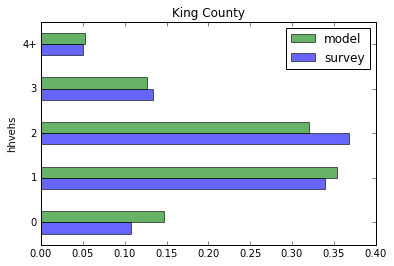

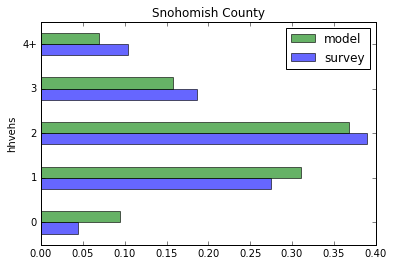

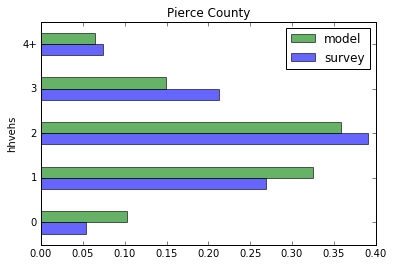

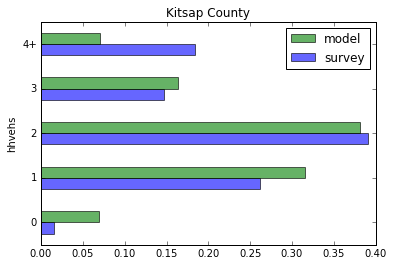

In [15]:
for county in df['geog_name'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County


In [16]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format

# Add geography lookup
df = df.merge(taz_geog[['taz','geog_name']], left_on='hhtaz', right_on='taz')
df.rename(columns={'geog_name':'hh_county'}, inplace=True)

df = df.merge(taz_geog[['taz','geog_name']], left_on='pwtaz', right_on='taz')
df.rename(columns={'geog_name':'work_county'}, inplace=True)

df_model = df[df['source'] == 'model'].groupby(['hh_county','work_county']).sum()[['psexpfac']].reset_index()
df_survey = df[df['source'] == 'survey'].groupby(['hh_county','work_county']).sum()[['psexpfac']].reset_index()

In [17]:
df_survey.merge(df_model, on=['hh_county','work_county'], suffixes=['_survey','_model'])

,hh_county,work_county,psexpfac_survey,psexpfac_model
0,King County,King County,"773,517","1,430,883"
1,King County,Kitsap County,447,644
2,King County,Pierce County,"22,889","42,203"
3,King County,Snohomish County,"14,240","47,604"
4,Kitsap County,King County,"21,051","7,867"
5,Kitsap County,Kitsap County,"50,380","144,859"
6,Kitsap County,Pierce County,"8,107","3,792"
7,Pierce County,King County,"65,933","101,743"
8,Pierce County,Kitsap County,"8,921","12,647"
9,Pierce County,Pierce County,"205,525","403,712"
